# 進階測驗

時間: 11:10-12:00；11:00-11:10為題目解講時間。如果在解講時間仍要做答而沒有聽清楚題目要做什麼，請自行負責。

方式: 一定要到教室進行小考，且有安排座位。請確定你的位置與你的學號相符。

不能與同學交談，不能傳訊息給同學，不能在寢室考試。它就是一次實體考試。只是線上的考試卷很方便，不用發下去。也幫你們做好了答題的位置。而且提前了10分鐘給說明。如果有問題就舉手問助教，問老師。但ChatGPT的答案不一定對，老師的題目也不見得是完備的。(因為如果題目很完整，說明的非常詳細，那麼直接給ChatGPT就有答案了，大家就複製貼上加註解就好了。老師也希望大家練習把不完備的說法給補齊。)

說明: 首先這個檔案是僅供檢視的，所以你必須在自己的雲端硬碟中另存副本，再開始進行你自己的回答。回答過程中可以使用ChatGPT, 最後需要附上ChatGPT的使用連結。(在ChatGPT右上角的Share Chat，把連結複製下來貼在最下面。為什麼要最下面呢？因為這個Share Chat必須是在你完成了所有問題的詢問之後再給出來，才會有完整的問答)

每一題有不同的分數，而每一題當中，程式碼都要有註解。請以文字框，把你的想法寫出來。評分將包含程式能否正確完成，有無註解，以及該回答的文字框中答案的完整性。

最後請將這個檔案下載成『你的學號_Quiz9.ipynb』檔案，並上傳到moodle繳交完成測驗。

以下這個文字框是要填寫的：

**學號: AN4126521**

**姓名: 江婕瀅**

**系級: 不分 116**

**組別: B1**

# 就一題：請以今日所教的類神經網路為基礎，自行改變一個不同的資料集，並應用上課所教的方式，做出分類的答案。

舉例來說，你可以產生tensor flow playground中在第一象限跟第三象限的兩組資料。
如果你不會產生新的資料集，你可以探討改變一下程式對問題的影響，如不同的層數對應的答案會是什麼。

同組的組員，可以使用同一個版本的程式來修改。但**不能跟同組其他同學的一模一樣**，需要自己做出一些改變，如使用不同區域(如兩個方形區域)的測試資料、真實的資料集、不同層數的類神經網路，不同的展示方式等等。

### **介紹你的資料集:**
把 x 和 y 分成第一象限跟第三象限的兩組資料

---

### **你要做分類工作是什麼:**
把 x y 分成兩類，1代表 X，-1 代表 Y

---

### **請把你的程式碼放在下面:**

---

### **你對修改的程式碼，是為了討論什麼:**
試著將老師提供的題目交給 ChatGPT，來完成老師提供的範例要求

---

### **你修改完之後，你的結論是什麼:**
第一層開始是代表要劃多少維度的線去分類資料，等到一定的程度後，最後一層是收斂結果，決定最終的資料會分成幾類。

---

#### ChatGPT 給我的評論：

你的結論基本上是正確的，但我想補充一些細節。

在神經網路中，每一層的神經元可以視為進行特徵的提取和轉換，而隨著層數的增加，模型可以學到更複雜的特徵。第一層通常稱為輸入層，其神經元數量應該等於輸入資料的特徵數。隨後的隱藏層則用來學習更高階的特徵表示。

在你的程式碼中，第一層是使用 N1 個神經元的全連接層，並使用 tanh 激活函數。這意味著該層可以學習將輸入特徵映射到介於 -1 和 1 之間的值。增加 N1 的數量通常可以提高模型的表示能力，但也可能增加過擬合的風險。

最後一層是輸出層，使用一個神經元並使用 tanh 激活函數。這種設置通常用於二元分類任務，其中 tanh 的輸出範圍介於 -1 和 1 之間，模型的預測結果可被解釋為類別的概率。

總的來說，神經網路透過多層的權重和激活函數的組合，學習複雜的非線性映射，從而實現分類或回歸等任務。你的程式碼透過訓練過程，讓模型能夠適應給定的資料分布，最終達到對資料進行正確分類的目的。

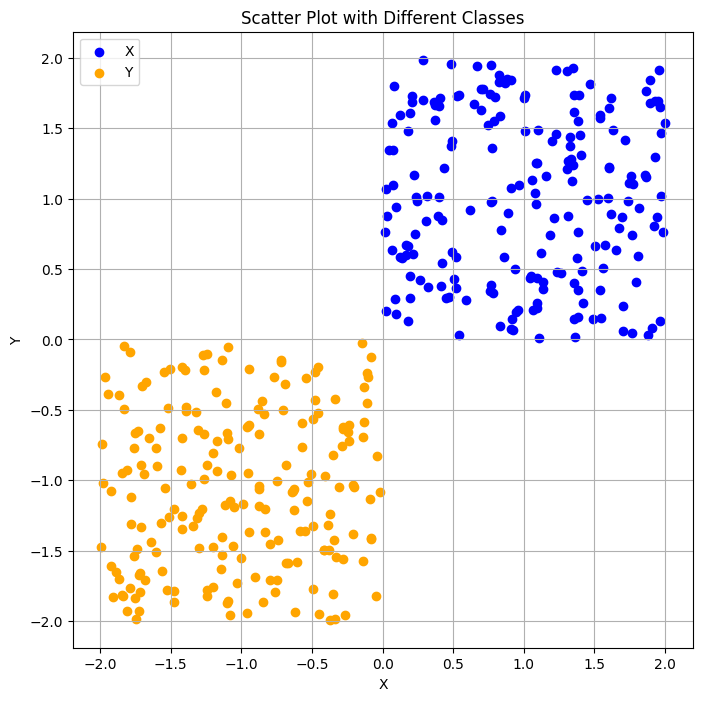

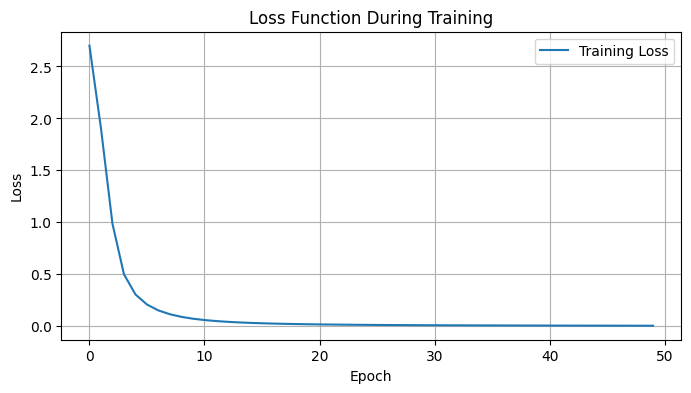

3/3 [==============================] - 0s 6ms/step


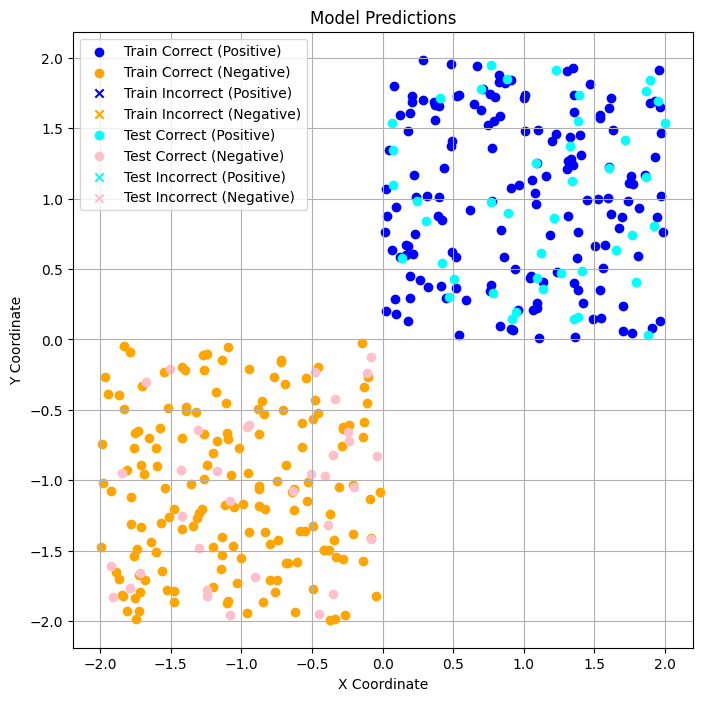

75/75 [==============================] - 0s 2ms/step


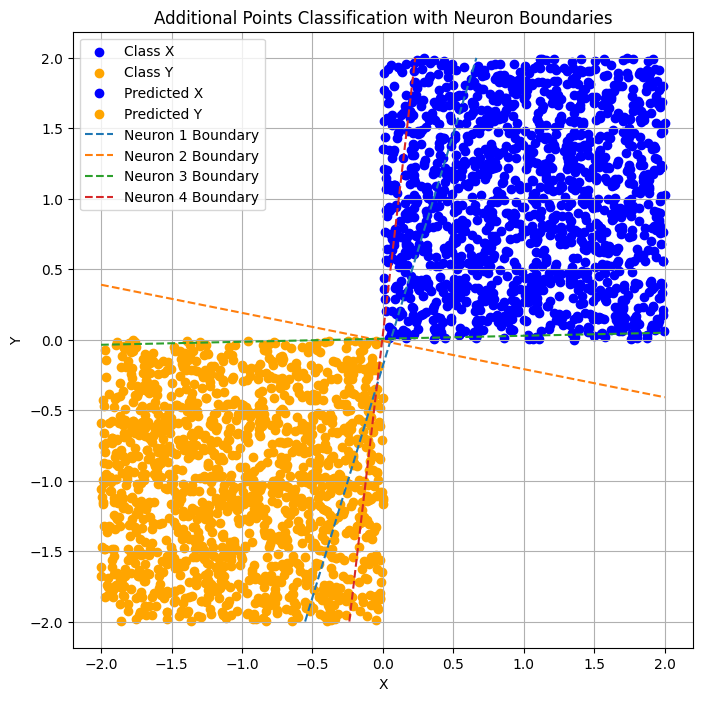

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

N = 200  # 原始點的數量
Np = 1200  # 額外點的數量

def generate_points(num_points):
    # 生成 X 的點，在第一象限
    x_X = np.random.uniform(0, 2, num_points)
    y_X = np.random.uniform(0, 2, num_points)

    # 生成 Y 的點，在第三象限
    x_Y = np.random.uniform(-2, 0, num_points)
    y_Y = np.random.uniform(-2, 0, num_points)

    return x_X, y_X, x_Y, y_Y

# 生成數據點
x_X, y_X, x_Y, y_Y = generate_points(N)

# 繪製散點圖
plt.figure(figsize=(8, 8))
plt.scatter(x_X, y_X, c='blue', marker='o', label='X')
plt.scatter(x_Y, y_Y, c='orange', marker='o', label='Y')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Different Classes')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 整合並標記數據點
X = np.vstack((np.column_stack((x_X, y_X)), np.column_stack((x_Y, y_Y))))
y = np.array([1] * N + [-1] * N)  # 1代表X，-1代表Y

# 分割數據集, 把 N 中的 20% 做為測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建神經網路模型
N1 = 4
model = Sequential()
model.add(Dense(N1, input_dim=2, activation='tanh'))  # 第一層有N1個神經元，使用tanh激活函數
model.add(Dense(2, input_dim=2, activation='tanh'))  # 第二層有2個神經元
model.add(Dense(1, activation='tanh'))  # 第三層有1個神經元

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 訓練模型並記錄訓練過程
history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0, validation_data=(X_test, y_test))

# 繪製損失函數圖
loss_values = history.history['loss']
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.legend()
plt.grid(True)
plt.show()

# 繪製模型預測結果
plot_predictions(X_train, y_train, X_test, y_test, model)

# 獲取第一層的權重和偏置
weights, biases = model.layers[0].get_weights()

# 生成更多隨機點進行預測
x_a_X, y_a_X, x_a_Y, y_a_Y = generate_points(Np)
additional_X = np.column_stack((np.concatenate([x_a_X, x_a_Y]), np.concatenate([y_a_X, y_a_Y])))
y_pred_additional = model.predict(additional_X)
y_pred_additional = np.where(y_pred_additional.flatten() >= 0, 1, -1)

# 繪製測試數據和預測結果
plt.figure(figsize=(8, 8))
plt.scatter(x_X, y_X, c='blue', marker='o', label='Class X')
plt.scatter(x_Y, y_Y, c='orange', marker='o', label='Class Y')
plt.scatter(additional_X[y_pred_additional == 1, 0], additional_X[y_pred_additional == 1, 1], c='blue', marker='o', label='Predicted X')
plt.scatter(additional_X[y_pred_additional == -1, 0], additional_X[y_pred_additional == -1, 1], c='orange', marker='o', label='Predicted Y')

# 繪製第一層的N1條直線
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
for i in range(N1):
    a, b = weights[:, i]
    c = biases[i]
    if abs(a) > abs(b):
        x_line = (-b * y_values - c) / a
        plt.plot(x_line, y_values, linestyle='--', label=f'Neuron {i+1} Boundary')
    else:
        y_line = (-a * x_values - c) / b
        plt.plot(x_values, y_line, linestyle='--', label=f'Neuron {i+1} Boundary')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Additional Points Classification with Neuron Boundaries')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


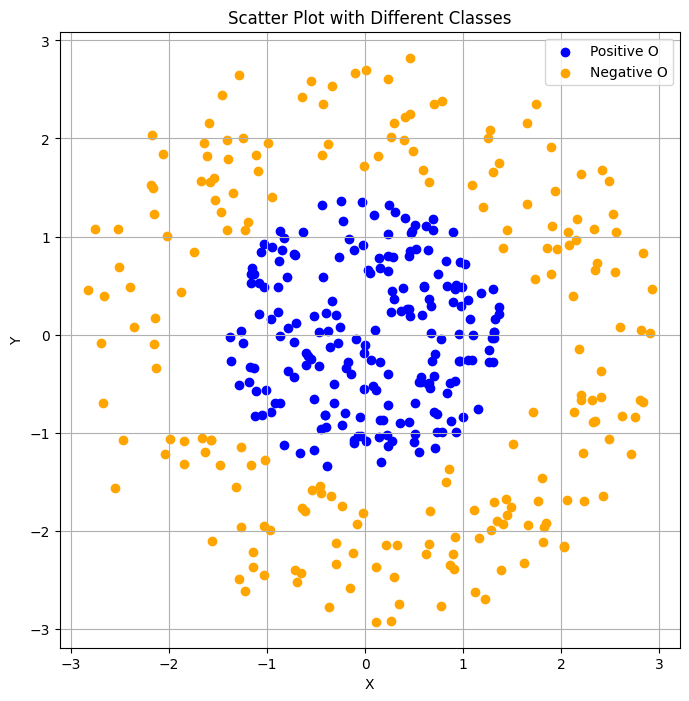

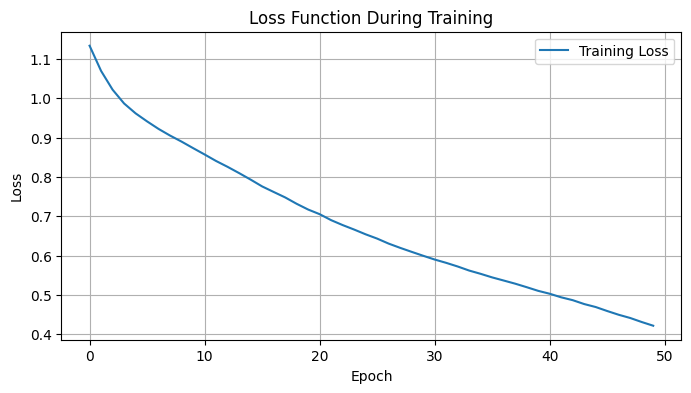

3/3 [==============================] - 0s 4ms/step


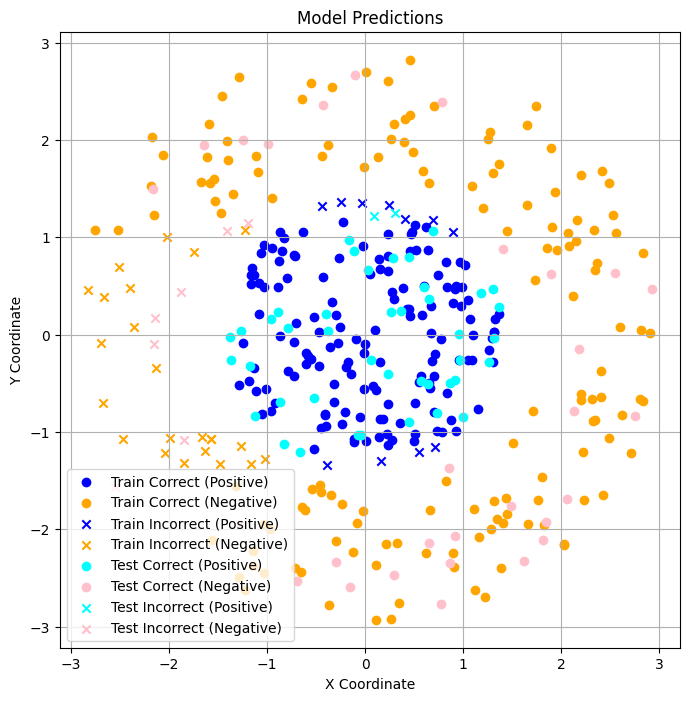

38/38 [==============================] - 0s 2ms/step


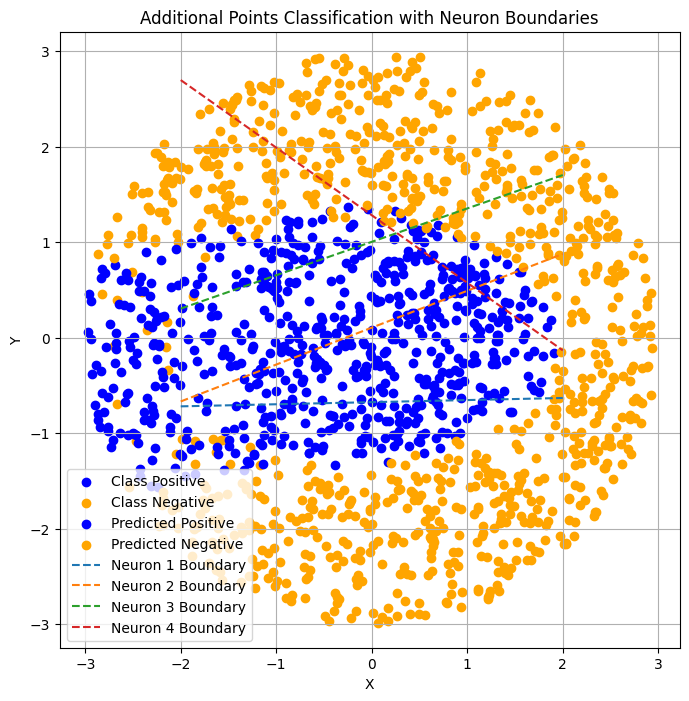

10/10 [==============================] - 0s 3ms/step
In training set:
TP= 145 TN= 141 FP= 23 FN= 11
Accuracy= 0.89375
TPR(Sensitivity, Recall)= 0.9294871794871795 TNR(Specificity)= 0.8597560975609756
預測為 o 的點中，屬於類別 o 的比例: 0.5076
預測為 o 的點中，屬於類別 x 的比例: 0.3952
預測為 x 的點中，屬於類別 x 的比例: 0.9227
預測為 x 的點中，屬於類別 o 的比例: 0.0258


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

N = 200  # 原始點的數量
Np = 1200  # 額外點的數量

def generate_circle_points(r_min, r_max, num_points):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = np.sqrt(np.random.uniform(r_min**2, r_max**2, num_points)) # 為什麼要這樣才會均勻, 請問數學老師
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return x, y

# 生成數據點
R0 = 0
R1 = 1.4
R2 = 1.6
R3 = 3
x_o, y_o = generate_circle_points(R0, R1, N)
x_x, y_x = generate_circle_points(R2, R3, N)

# 繪製散點圖
plt.figure(figsize=(8, 8))
plt.scatter(x_o, y_o, c='blue', marker='o', label='Positive O')
plt.scatter(x_x, y_x, c='orange', marker='o', label='Negative O')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Different Classes')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(X_train, y_train, X_test, y_test, model):
    # 使用模型對訓練集進行預測
    y_pred_train_continuous = model.predict(X_train)
    y_pred_train = np.where(y_pred_train_continuous.flatten() >= 0, 1, -1)

    # 使用模型對測試集進行預測
    y_pred_test_continuous = model.predict(X_test)
    y_pred_test = np.where(y_pred_test_continuous.flatten() >= 0, 1, -1)
    plt.figure(figsize=(8, 8))

    # 訓練集 - 預測正確
    correct_train = (y_train == y_pred_train)
    oc = (y_train == 1) & correct_train
    xc = (y_train == -1) & correct_train
    plt.scatter(X_train[oc, 0], X_train[oc, 1], c='blue', marker='o', label='Train Correct (Positive)')
    plt.scatter(X_train[xc, 0], X_train[xc, 1], c='orange', marker='o', label='Train Correct (Negative)')

    # 訓練集 - 預測錯誤
    incorrect_train = (y_train != y_pred_train)
    oi = (y_train == 1) & incorrect_train
    xi = (y_train == -1) & incorrect_train
    plt.scatter(X_train[oi, 0], X_train[oi, 1], c='blue', marker='x', label='Train Incorrect (Positive)')
    plt.scatter(X_train[xi, 0], X_train[xi, 1], c='orange', marker='x', label='Train Incorrect (Negative)')

    # 測試集 - 預測正確
    correct_test = (y_test == y_pred_test)
    oc = (y_test == 1) & correct_test
    xc = (y_test == -1) & correct_test
    plt.scatter(X_test[oc, 0], X_test[oc, 1], c='cyan', marker='o', label='Test Correct (Positive)')
    plt.scatter(X_test[xc, 0], X_test[xc, 1], c='pink', marker='o', label='Test Correct (Negative)')

    # 測試集 - 預測錯誤
    incorrect_test = (y_test != y_pred_test)
    oi = (y_test == 1) & incorrect_test
    xi = (y_test == -1) & incorrect_test
    plt.scatter(X_test[oi, 0], X_test[oi, 1], c='cyan', marker='x', label='Test Incorrect (Positive)')
    plt.scatter(X_test[xi, 0], X_test[xi, 1], c='pink', marker='x', label='Test Incorrect (Negative)')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Model Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()


# 整合並標記數據點
X = np.vstack((np.column_stack((x_o, y_o)), np.column_stack((x_x, y_x))))
y = np.array([1] * N + [-1] * N)  # 1代表o，-1代表x

# 分割數據集, 把 N 中的 20% 做為測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建神經網路模型
N1 = 4
model = Sequential()
model.add(Dense(N1, input_dim=2, activation='tanh'))  # 第一層有N1個神經元，使用tanh激活函數
model.add(Dense(2, input_dim=2, activation='tanh'))  # 第二層有2個神經元
model.add(Dense(1, activation='tanh'))  # 第三層有1個神經元

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])



# 訓練模型並記錄訓練過程
history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0, validation_data=(X_test, y_test))

# 獲取損失函數值
loss_values = history.history['loss']

# 繪製損失函數圖
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.legend()
plt.grid(True)
plt.show()

# 获取训练和验证集准确度
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# 绘制准确度图
#plt.figure(figsize=(8, 4))
#plt.plot(train_acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.title('Model Accuracy during Training')
#plt.legend()
#plt.grid(True)
#plt.show()


plot_predictions(X_train, y_train, X_test, y_test, model)


# 獲取第一層的權重和偏置
weights, biases = model.layers[0].get_weights()

# 生成更多隨機點進行預測
x_a, y_a = generate_circle_points(R0, R3, Np)
additional_X = np.column_stack((x_a, y_a))
y_pred_additional = model.predict(additional_X)
y_pred_additional = np.where(y_pred_additional.flatten() >= 0, 1, -1)

# 繪製測試數據和預測結果
plt.figure(figsize=(8, 8))
plt.scatter(x_o, y_o, c='blue', marker='o', label='Class Positive')
plt.scatter(x_x, y_x, c='orange', marker='o', label='Class Negative')
plt.scatter(additional_X[y_pred_additional == 1, 0], additional_X[y_pred_additional == 1, 1], c='blue', marker='o', label='Predicted Positive')
plt.scatter(additional_X[y_pred_additional == -1, 0], additional_X[y_pred_additional == -1, 1], c='orange', marker='o', label='Predicted Negative')

# 繪製第一層的N1條直線
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
for i in range(N1):
    a, b = weights[:, i]
    c = biases[i]
    if abs(a) > abs(b):
        x_line = (-b * y_values - c) / a
        plt.plot(x_line, y_values, linestyle='--', label=f'Neuron {i+1} Boundary')
    else:
        y_line = (-a * x_values - c) / b
        plt.plot(x_values, y_line, linestyle='--', label=f'Neuron {i+1} Boundary')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Additional Points Classification with Neuron Boundaries')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


#loss, accuracy = model.evaluate(X_train, y_train)
#print('train loss: ', loss)
#print('train accuracy: ', accuracy)

y_pred_train_continuous = model.predict(X_train)
y_pred_train = np.where(y_pred_train_continuous.flatten() >= 0, 1, -1)

TP = sum((y_pred_train==1) & (y_train == 1))
TN = sum((y_pred_train==-1) & (y_train == -1))
FP = sum((y_pred_train==1) & (y_train == -1))
FN = sum((y_pred_train==-1) & (y_train == 1))
print("In training set:")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = 1-TNR
FNR = 1-TPR
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
F1 = 2*PPV*TPR/(PPV+TPR)
ACC = (TP+TN)/(TP+TN+FP+FN)
print("TP=",TP,"TN=",TN,"FP=",FP,"FN=",FN)
print("Accuracy=",ACC)
print("TPR(Sensitivity, Recall)=",TPR,"TNR(Specificity)=",TNR)


#loss, accuracy = model.evaluate(X_test, y_test)
#print('test loss: ', loss)
#print('test accuracy: ', accuracy)

#y_pred_test_continuous = model.predict(X_test)
#y_pred_test = np.where(y_pred_test_continuous.flatten() >= 0, 1, -1)


# 计算每个点与原点的距离的平方
distances_squared = np.sum(additional_X**2, axis=1)

# 模型预测为 1（类别 o）的点
o_predicted = additional_X[y_pred_additional == 1]

# 模型预测为 -1（类别 x）的点
x_predicted = additional_X[y_pred_additional == -1]

# 计算预测为类别 o 的点中，实际上也属于类别 o 的比例（x^2 + y^2 < 1）
o_correct = np.sum(np.sum(o_predicted**2, axis=1) < R1**2)
o_total = o_predicted.shape[0]
o_correct_ratio = o_correct / o_total if o_total > 0 else 0

# 计算预测为类别 o 的点中，实际上属于类别 x 的比例（x^2 + y^2 > 1）
o_incorrect = np.sum(np.sum(o_predicted**2, axis=1) > R2**2)
o_incorrect_ratio = o_incorrect / o_total if o_total > 0 else 0

# 计算预测为类别 x 的点中，实际上也属于类别 x 的比例（x^2 + y^2 > 2^2）
x_correct = np.sum(np.sum(x_predicted**2, axis=1) > R2**2)
x_total = x_predicted.shape[0]
x_correct_ratio = x_correct / x_total if x_total > 0 else 0

# 计算预测为类别 x 的点中，实际上属于类别 o 的比例（x^2 + y^2 < 2^2）
x_incorrect = np.sum(np.sum(x_predicted**2, axis=1) < R1**2)
x_incorrect_ratio = x_incorrect / x_total if x_total > 0 else 0

print("預測為 o 的點中，屬於類別 o 的比例: {:.4f}".format(o_correct_ratio))
print("預測為 o 的點中，屬於類別 x 的比例: {:.4f}".format(o_incorrect_ratio))
print("預測為 x 的點中，屬於類別 x 的比例: {:.4f}".format(x_correct_ratio))
print("預測為 x 的點中，屬於類別 o 的比例: {:.4f}".format(x_incorrect_ratio))


# **References:**

* 有使用ChatGPT嗎: 有 。[對話連結](https://chat.openai.com/share/c8a39971-9bb9-4267-8fe8-e168c6991169)
* 有同組共同的版本嗎？ 無。